### Problem Set 2:
### Maxwell A. Fine

### Problem 1 – Optical depth
The diffuse ionised gas, also referred to as the Reynolds layer, is a nearly fully ionised gas in the
Galaxy with a mean midplane density of 0.025 cm−3 and a scale height of about 1 kpc. What is
the optical depth for Thomson scattering along the midplane of the Milky Way between us and the
Galactic center (8 kpc away)?

Recall:
$\sigma_{t} = 7\times10^{-25}$ $\mathrm{cm}^2$

$1pc = 3\times10^{18} \mathrm{cm}$


### Answer:

This is a simple question about extinction and dimensional analysis. 

Recall that $d\tau = \chi_{\nu}ds$, opitical depth $\tau$ is a dimensionless quanity that is a measure of the extinction $\chi_{\nu}$ ($\mathrm{cm}^{-1}$). 

We are given $\rho = 0.025$ cm-3 a number particle density and told of a fully ionised gas. 

We can then write $\chi_{\nu} = \rho \sigma_t,$ where $\sigma_t$ is the Thompson scattering coefficent of an electron. 

We should however introduce a factor of $1/2$ as electrons are the primary source of Extinction, not free protons. (Assuming the density we are given is for total particles, we might be off by a factor of $1/2$ but thats small anyway)

Putting it all together we have:

$$\tau = 0.5 \rho \sigma_t S$$
where $S$=8kpc

Plugging in numbers we get

$$\tau = 0.5 *0.025 *  7\times10^{-25} * 8\times10^{3}*3\times10^{18}  = 2.1\times10^{-4}$$



### Problem 2 – Radiative transfer (see R&L Section 1.4)

### Part A:

A sphere of material with radius R has constant emissivity jν, absorption coefficient αν, and source
function Sν.

$$ F_{\nu} = \pi S_{\nu}[1- \frac{2}{\tau^{2}}(1-e^{-\tau}) + \frac{2e^{-\tau}}{\tau}]$$



### Answer:

Let $\mu = \cos\theta$

Recall: 
(B) $F = 2 \pi \int_0^1 I_{\nu} \mu d\mu$

To start we need to find $I_{v}$.

Another way of saying that the sphere has constant emissivity and extintion is to say that the sphere is homogenious. 
This means we can write the solution of the equation of transfer as:

$$I_{\nu}(\mu) = \int_{0}^{\tau_{\nu}} S_\nu (\tau) e^{-\tau \mu} d\tau$$

We can solve this because $S_{\nu}$ is a constant! 

$$I_{\nu}(\mu) =  S_{\nu}[1-e^{-\tau \mu}]$$ 

This is the emerging specific intensity in the outward direction. To find the flux, we need to solve (B).

Lets start:
$$F = 2 \pi \int_0^1 I_{\nu} \mu d\mu$$
now we plug in our $I_{\nu}.$

$$F = 2 \pi \int_0^1 S_{\nu}[1-e^{-\tau \mu}] \mu d\mu$$

We break the integral into two parts and solve. 

$$F_\nu = \pi S_{\nu} - 2 \pi S_{\nu}  \int_{0}^{1} e^{-\tau \mu} \mu d \mu$$

$$F_\nu = \pi S_{\nu} - \frac{2 \pi S_{\nu}(1(-\tau + 1))e^{-\tau}} {\tau^{2}}$$

Now we just have to rewrite and hope we got it correct!

$$ F_{\nu} = \pi S_{\nu}[1- \frac{2}{\tau^{2}}(1-e^{-\tau}) + \frac{2e^{-\tau}}{\tau}]$$
Confirmed!!



### Part B:
Code up the expression for Iν and make a plot showing the angular dependence of Iν for different
values of τ . Verify that Iν and Fν make sense in the limits of τ << 1 and τ >> 1.







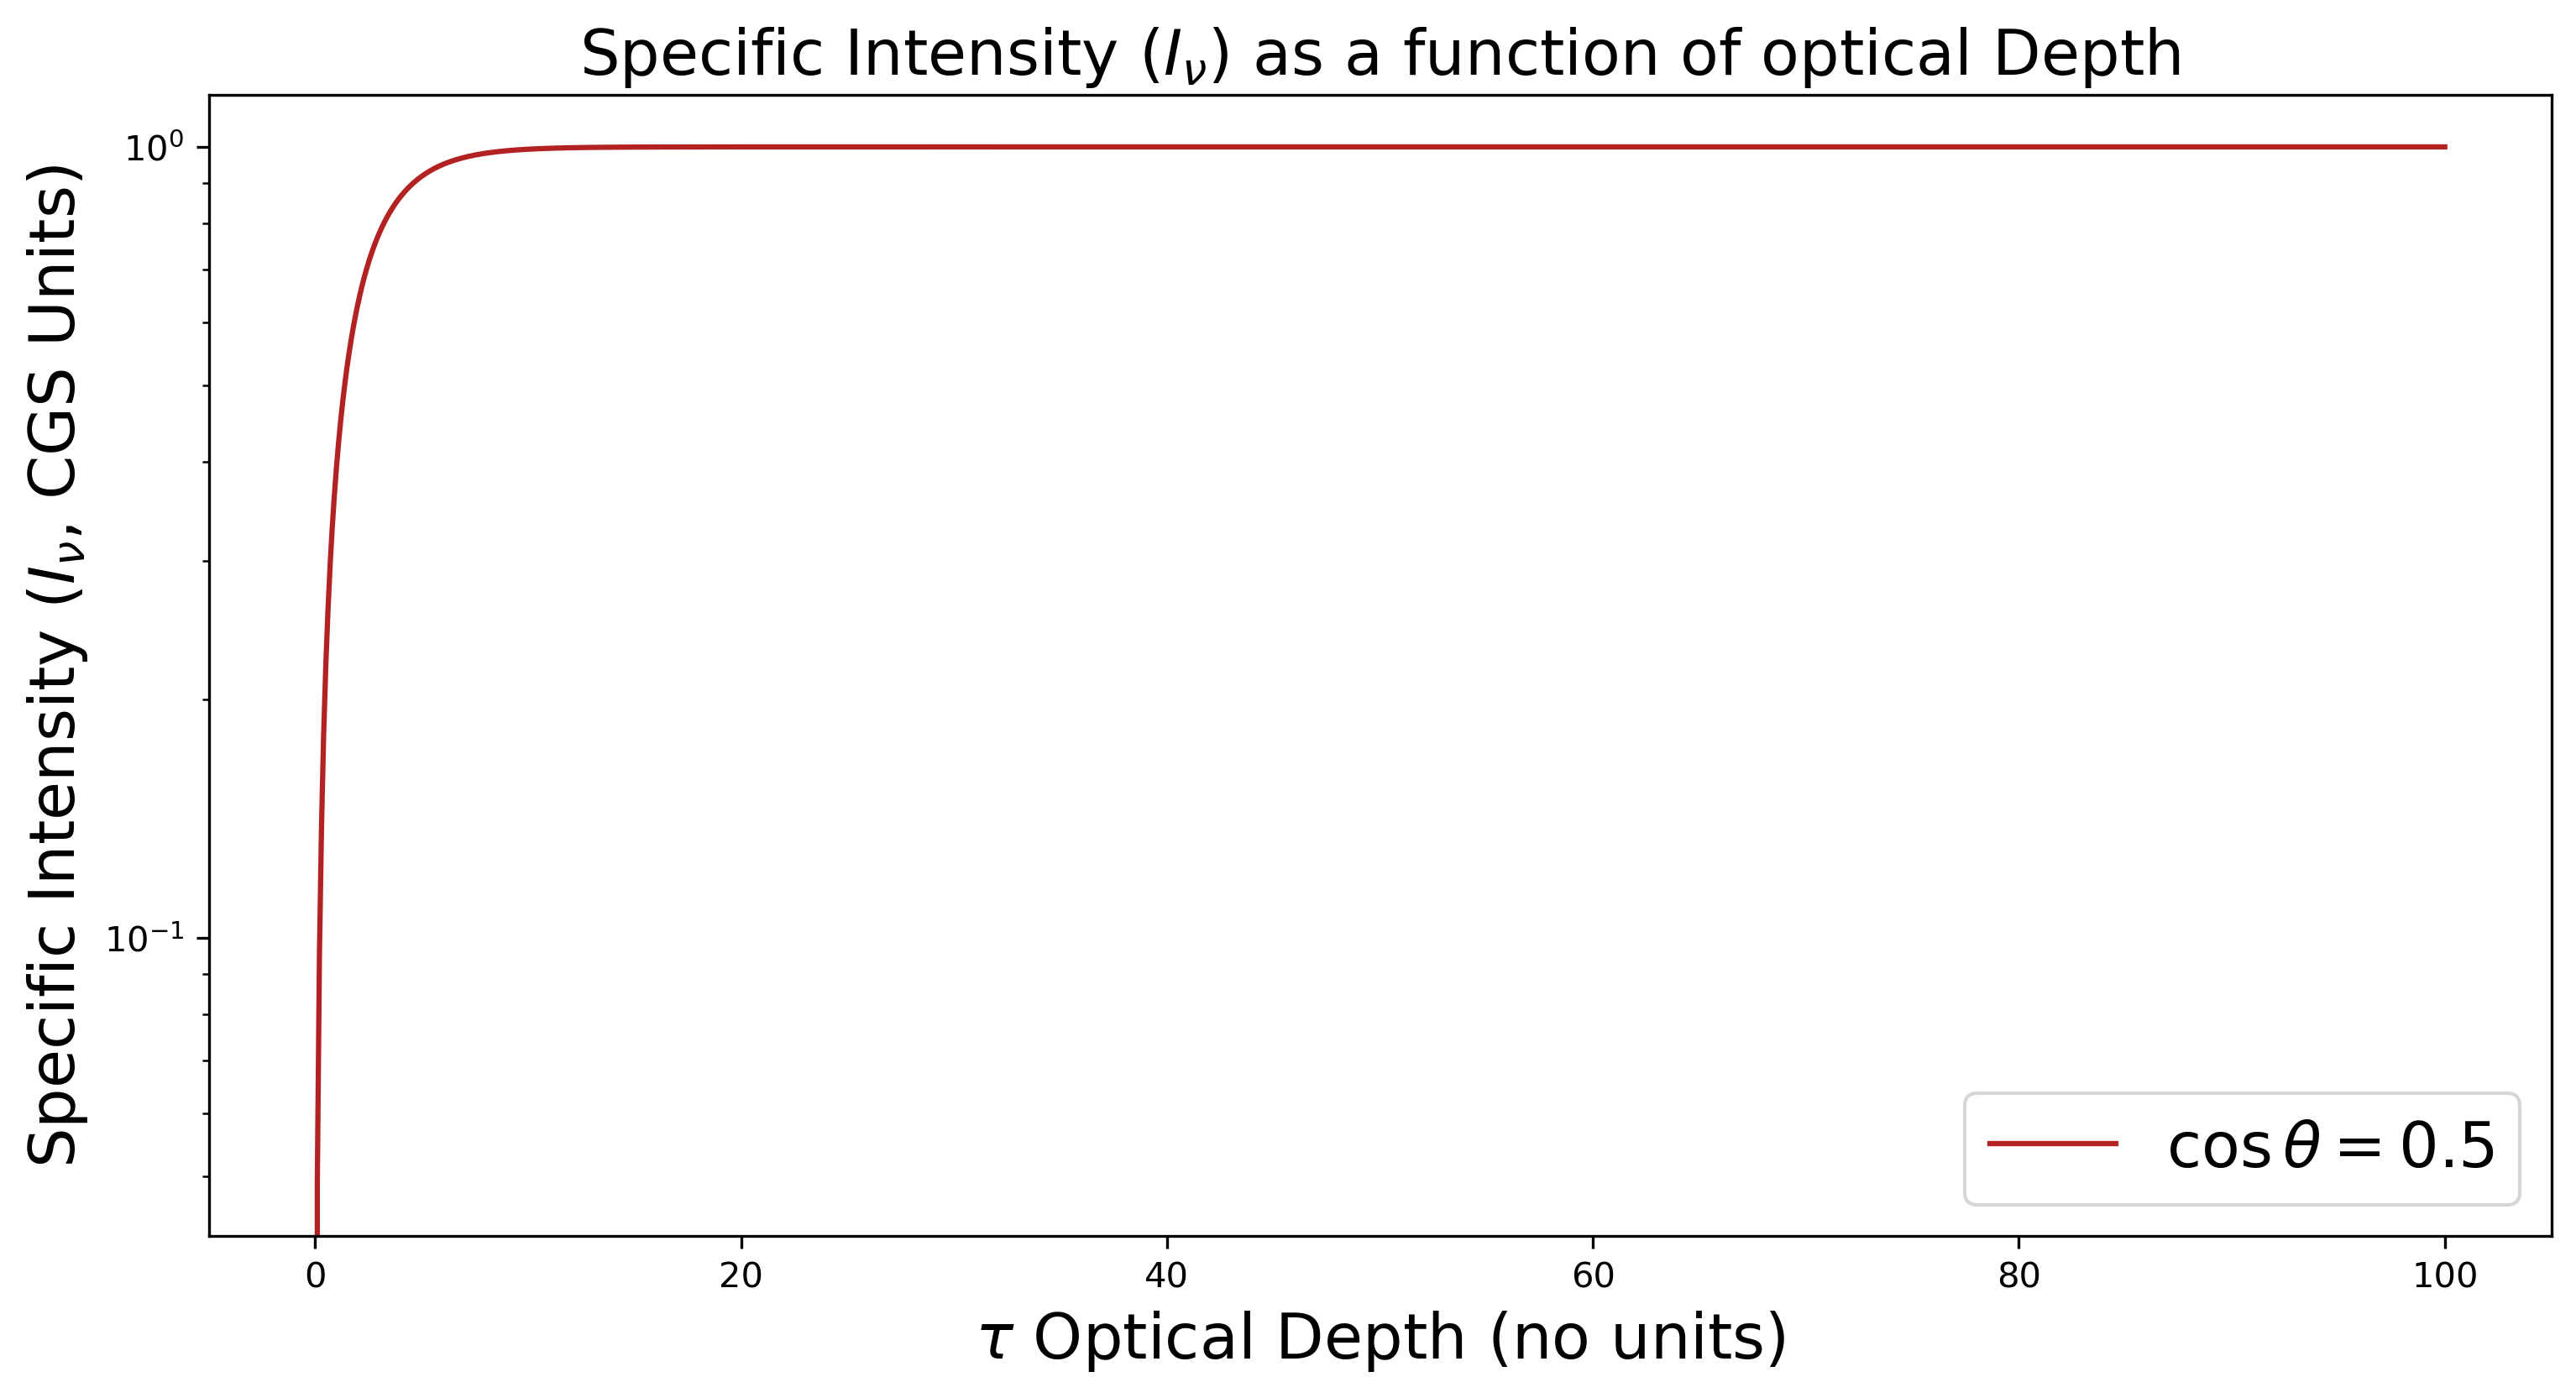

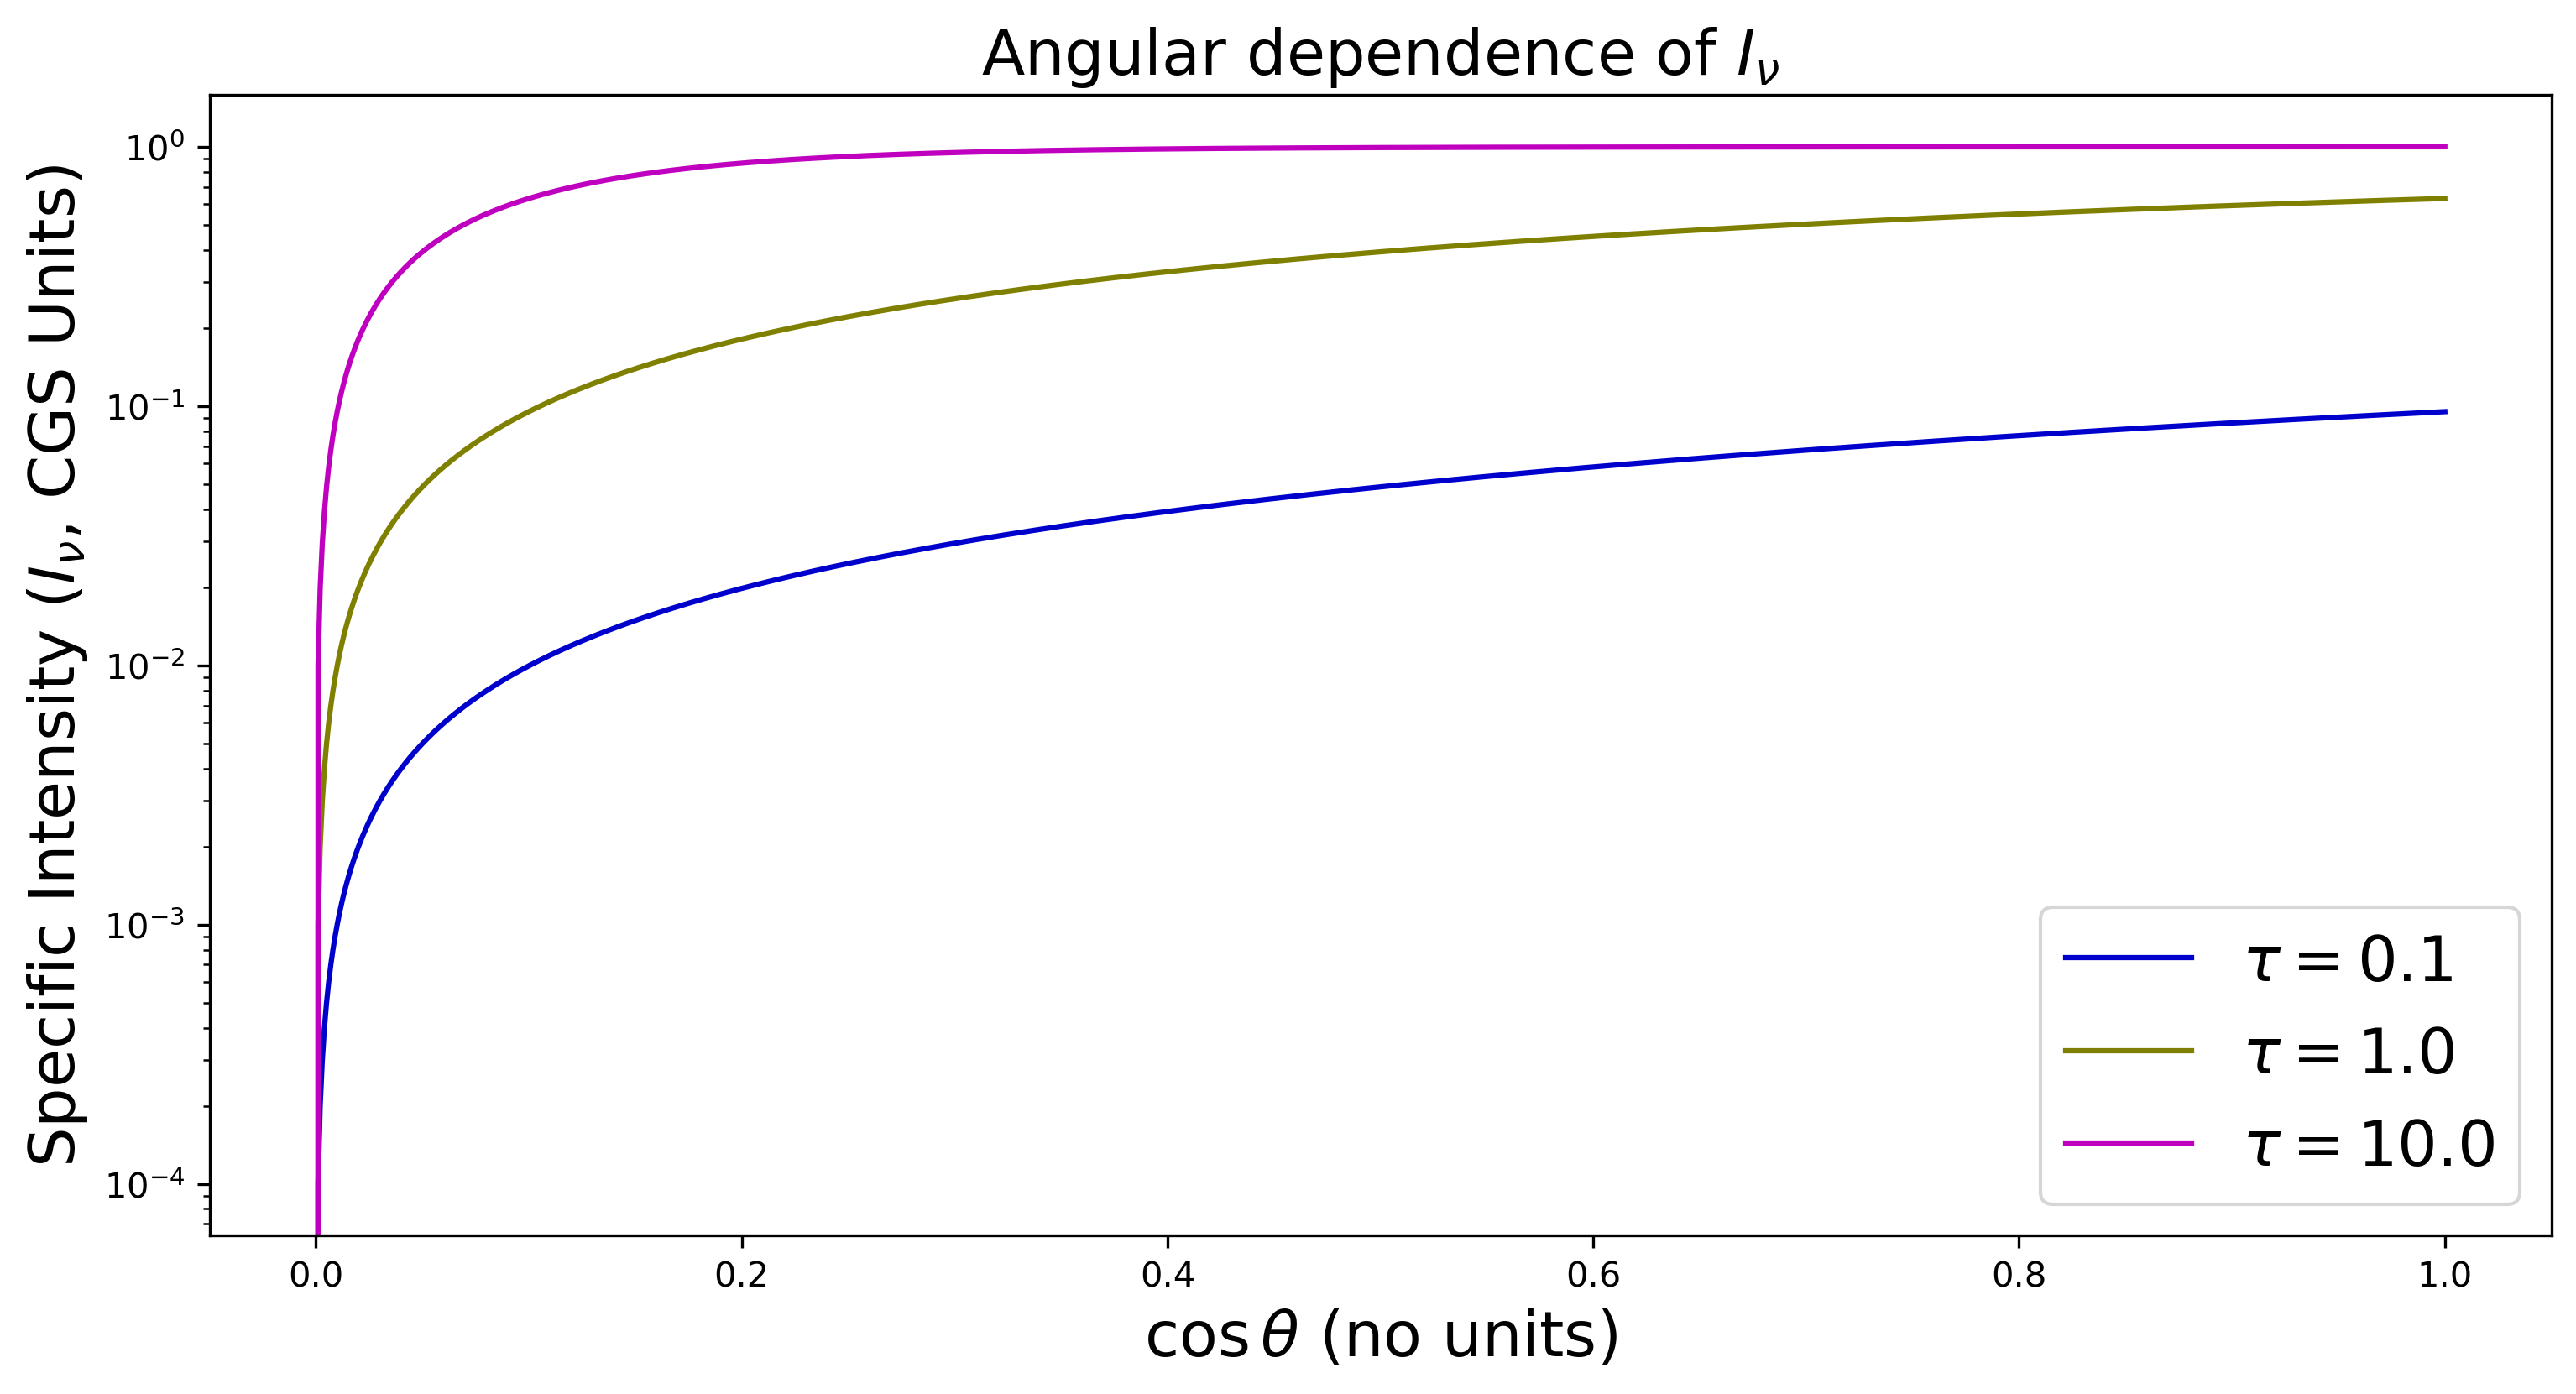

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate specific intensity
def calculate_intensity(tau, mu, S_nu):
    return S_nu * (1 - np.exp(-tau * mu))


# Parameters for the first plot
tau_values = np.linspace(0, 100, 1000)
mu_value = 0.5
S_nu_value = 1.0

# Optical Depth Plot
plt.figure(figsize=(12, 6), dpi=300)
# Plot specific intensity as a function of optical depth
plt.plot(tau_values, calculate_intensity(tau_values, mu_value, S_nu_value), color='firebrick', label=r'$\cos\theta = 0.5$')
plt.yscale('log')
plt.xlabel(r'$\tau$ Optical Depth (no units)', size=18)
plt.ylabel(r'Specific Intensity ($I_{\nu}$, CGS Units)', size=18)
plt.legend(fontsize=18)
plt.title(r'Specific Intensity ($I_{\nu}$) as a function of optical Depth', size=18)

# Angular Dependence Plot
plt.figure(figsize=(12, 6), dpi=300)

# Parameters for the second plot
mu_values = np.linspace(0, 1, 1000)
tau_values = [0.1, 1.0, 10.0]
colors = ['mediumblue', 'olive', 'm']

# Plot angular dependence of specific intensity for different values of optical depth
for tau, color in zip(tau_values, colors):
    I_nu_values = calculate_intensity(tau, mu_values, S_nu_value)
    plt.plot(mu_values, I_nu_values, label=r'$\tau = {:.1f}$'.format(tau), color=color)

plt.yscale('log')
plt.xlabel(r'$\cos\theta$ (no units)', size=18)
plt.ylabel(r'Specific Intensity ($I_{\nu}$, CGS Units)', size=18)
plt.title(r'Angular dependence of $I_{\nu}$', size=18)
plt.legend(fontsize=18)

#### Problem 2B Comment

To verify that $I_{\nu}$ and $F_{\nu}$ make sense in the limits of $\tau \ll 1$ and $\tau \gg 1$, we can consider the behavior of the expressions:

$$\tau \ll 1:$$
- As $\tau$ approaches zero, the exponential term $\exp(-\tau \mu)$ becomes close to 1.
- Therefore, $I_{\nu} \approx S_{\nu}(1 - e^{-\tau \mu}) \approx S_{\nu}$, which implies a constant intensity.
- $F_{\nu}$ should also approach $\pi S_{\nu}$ in this limit.

$$\tau \gg 1:$$
- As $\tau$ becomes very large, the term $e^{-\tau}$ dominates, and $e^{-\tau \mu}$ approaches zero for all values of $\mu$.
- In this limit, $I_{\nu} \approx S_{\nu}$, and the integral in the expression for $F_{\nu}$ reduces to zero.
- Therefore, $F_{\nu} \approx \pi S_{\nu}$ in this limit.


### Problem 3: 

Following the reconmended procedure as per the handout. 

I was unable to even begin problem 3A. I did not and still do not really understand how to attempt part A of this problem. I have not done relativistic EM nor radiation from point charges prior to this class. I don't know or understand the equations and certainty could not draw the diagram or write out the associated vectors. I am trying to read Griffiths for retarded potentials and radiation but I dont have enough time to really learn it. I brokedown and cried over this problem (no joke, but maybe not strickly speaking about the problem)

If I start from the solutions vectors, diagram and formula for power and power per solid angle I can do it. But thats more of a math exercise then physics at that point.

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q3_1.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q3_2.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q3_3.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q3_4.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q3_5.jpeg)



### Problem 4 – Cyclotron Lines
(a) The inverse process to cyclotron radiation is known as cyclotron absorption, where an electron
can actually absorb waves corresponding to harmonics of the gyrofrequency. The binary X-ray
source Hercules X-1 is composed of a neutron star in orbit around a normal star. It shows a strong
feature in its spectrum at 34 keV that is thought to be due to electron cyclotron absorption arising
in the hot gas near the poles of the NS. Estimate the magnetic field strength of the NS. How does
this value compare with the magnetic field strength near the Earth’s surface and with that in a
sunspot (approximate answers here are fine).


(b) Conceptual extension of the concepts: Could we hope to make an image and determine the
position of an extragalactic cosmic ray source that emits 1014 eV protons? Why or why not?


Recall:

Constants:

$\hbar = 10^{-27} \mathrm{erg *s}$

$1 \mathrm{Kev} = 1.60218 \times 10^{-9} \mathrm{erg}$

$m_e = 10^{-27} \mathrm{g} $

$e = 5\times10^{-10} \mathrm{esu}$

$c = 3\times10^{10} cm$

$m_p = 1.67 \times 10^{-24} \mathrm{g}$


### Part A

Recall the cyclotron frequency is given by:

$$\omega_{B} = \frac{eB}{m_ec}$$


Recall that the energy of a photon is given by:

$$ E= \hbar \omega$$

Using these two equations we can solve for the magnetic field strength $B$

$$\omega = \frac{E}{\hbar} = \frac{eB}{m_ec} $$

$$ B = \frac{Em_ec}{e\hbar} $$

Filling in with numbers we have:

$$ B = \frac{Em_ec}{e\hbar} = \frac{34 *1.60218 \times 10^{-9} *10^{-27} * 3\times10^{10}}{ 5\times10^{-10}* 10^{-27}} = 3\times10^3 \mathrm{G}$$


### part B:

Assuming that when the problem says $10^{14} \mathrm{eV}$ protons that is the kinetic energy of the proton. 

We can calculate the gyroradius of the proton, and if it seems resonably sized then maybe its possible. But if its much much larger then the a typically galaxy then thats a  no. 

Asssume $B = 3\times10^3 \mathrm{G}$ because thats $B$ from part A and hence rational to use. 

$r_g = \frac{m_pcv}{eB}$

this would seem easy to solve, except that getting the velocity is quite hard as the particle is relativistic. 

$E_k = (\gamma -1)m_pc^2$

After some algebra I get the following (which I hope is right!)

$$V = c \sqrt{\frac{1}{(\frac{E}{m_pc^2}+1)^2} -1}$$

This means I get a radius of:

$r_g = \frac{m_pc^2\sqrt{\frac{1}{(\frac{E}{m_pc^2}+1)^2} -1}}{eB}$

Lets plug in numbers in the morning


$r_g = \frac{1.67 \times 10^{-24}* (3\times10^{10})^2\sqrt{\frac{1}{(\frac{10^{14} * 1.60218 \times 10^{-9}}{1.67 \times 10^{-24}* (3\times10^{10})^2}+1)^2} -1}}{5\times10^{-10}*3\times10^3 \mathrm{G}}$







### Problem 5 – Thomson Cross Section, E&M derivation

Imagine a “typical” EM planar wave (with E~ ⊥ B~ ⊥ ~k and assume |E| ∝ cos(ωt)) impacting on an
electron at rest.

(a) Use F = ma to derive the response of the particle to the wave (assume to first order that the
small velocity makes the magnetic part of the Lorentz force negligible) and derive an expression
for dP/dΩ. Average this expression over time.

(b) Use the definition of the differential cross section dσ/dΩ = dP
dΩ
/ < ~s >t to solve for dσ/dΩ.
Rewrite in terms of the classical electron radius r0 = e
2/mec
2
.

(c) Finally, integrate over dΩ to find the total cross section σ. Confirm that your σ is the same as
the Thomson cross section σT .

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q5_1.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q5_2.jpeg)

![ALT_TEXT_FOR_SCREEN_READERS](https://afinemax.github.io/afinemax1/images/extreme_astro/q5_3.jpeg)